### In this notebook:
I perform random search with xgboost model to find hyperparameters and summarize results. I use feature matrix with 10% sampled data from original dataset. Feature matrix has selected variables after feature selection. See notebook `feature_selection`.

### About project:
Data is from Kaggle competiotion [Home Credit Default Risk](https://www.kaggle.com/c/home-credit-default-risk). 

I implement an automated feature engineering approach with an open-source library [Featuretools](https://www.featuretools.com/). 


In [1]:
import xgboost as xgb 

In [2]:
import numpy as np
import pandas as pd
import time
import pickle

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV

In [5]:
fm_sample = pd.read_csv('../data/fm_train_sample_trans.csv')

In [6]:
id_col = 'SK_ID_CURR'
target_col = 'TARGET'

predictors = [x for x in fm_sample.columns if x not in [id_col, target_col]]

In [7]:
#X_train, X_test, y_train, y_test = train_test_split(fm_sample[predictors], fm_sample[target_col], test_size=0.2, random_state=42)

In [8]:
id_col = 'SK_ID_CURR'
target_col = 'TARGET'

In [9]:
predictors = [x for x in fm_sample.columns if x not in [id_col, target_col]]

In [10]:
X_train = fm_sample[predictors]
y_train = fm_sample[target_col]

In [11]:
#dtrain = xgb.DMatrix(data=X_train.values, label=y_train.values, feature_names=predictors)
#dtest = xgb.DMatrix(data=X_test.values, label=y_test.values, feature_names=predictors)

In [13]:
clf = xgb.XGBClassifier(objective='binary:logistic', n_jobs=-1, silent=0)

In [14]:
param_dist = {
    'max_depth': range(3,10),
    'learning_rate': np.logspace(np.log10(0.005), np.log10(0.5), base = 10, num = 1000),
    'n_estimators': range(100, 1100, 100),
    'gamma': np.linspace(0, 0.4, 6),
    'min_child_weight': range(1,6,2),
    'subsample': np.linspace(0.5, 1, 101),
    'colsample_bytree': np.linspace(0.6, 1, 11),
    'colsample_bylevel': np.linspace(0.6, 1, 11),
    'reg_alpha': np.linspace(0, 1),
    'reg_lambda': np.linspace(0, 1)

}

#### Note: Random search computation I run on AWS EC2 due to my local machine constrains.


In [18]:
## Code below to run on AWS EC2

# n_iter_search = 40

# random_search = RandomizedSearchCV(estimator=clf, param_distributions=param_dist, n_iter=n_iter_search, cv=5, scoring='roc_auc' )

# start = time.time()

# random_search.fit(X=X_train.values, y=y_train.values)

# end = time.time()
# print('Computation took {} sec.'.format(round(end - start), 1))


### Results Summary

In [5]:
with open('../data/random_search_results.pkl', mode='rb') as f:
    res_rand_search1 = pickle.load(f)

In [6]:
with open('../data/random_search_results2.pkl', mode='rb') as f:
    res_rand_search2 = pickle.load(f)

In [19]:
with open('../data/random_search_results3.pkl', mode='rb') as f:
    res_rand_search3 = pickle.load(f)

In [7]:
df_res_rand_search1 = pd.DataFrame(res_rand_search1)
df_res_rand_search2 = pd.DataFrame(res_rand_search2)
df_res_rand_search3 = pd.DataFrame(res_rand_search3)

In [21]:
df_res_rand_search = pd.concat([df_res_rand_search1, df_res_rand_search2, df_res_rand_search3], axis=0)

In [22]:
df_res_rand_search.shape

(30, 30)

In [23]:
time_score = df_res_rand_search.loc[:, ['mean_fit_time', 'mean_test_score', 'rank_test_score']]

In [24]:
time_score.head()

,mean_fit_time,mean_test_score,rank_test_score
0,1746.051089,0.727369,5
1,583.780619,0.754911,1
2,602.575312,0.711377,9
3,76.135446,0.738691,4
4,618.417438,0.714018,8


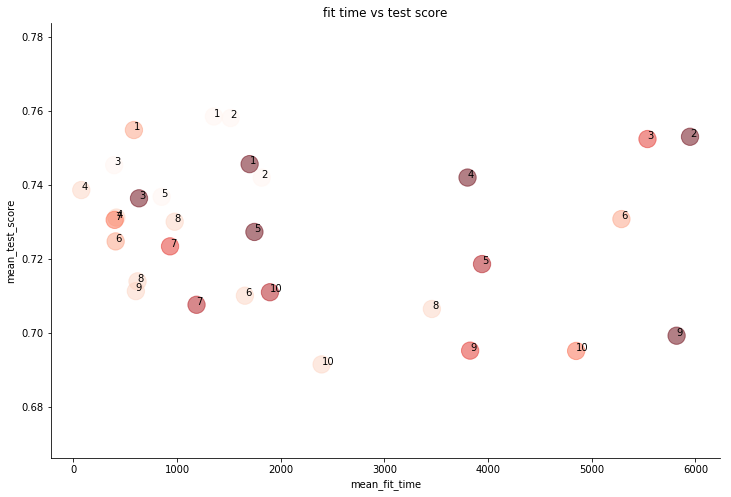

In [38]:
fig, ax = plt.subplots(figsize=(12,8))

x = time_score['mean_fit_time'].tolist()
y = time_score['mean_test_score'].tolist()
ann = time_score['rank_test_score'].tolist()


ax.scatter(x='mean_fit_time', y='mean_test_score', s=300, alpha=0.5 , c= df_res_rand_search['param_max_depth'].tolist(), cmap='Reds', data=time_score)

ax.set_xlabel('mean_fit_time')
ax.set_ylabel('mean_test_score')
plt.title('fit time vs test score')

for i, txt in enumerate(ann):
    ax.annotate(txt, (x[i], y[i]))

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


In [32]:
df_res_rand_search.loc[df_res_rand_search['rank_test_score'] == 1, : 'params' ].T

,1,3,7
mean_fit_time,583.781,1699.64,1355.03
mean_score_time,0.394879,1.37658,0.871558
mean_test_score,0.754911,0.745693,0.758565
mean_train_score,0.979453,0.999215,0.850172
param_colsample_bylevel,0.68,0.92,0.68
param_colsample_bytree,0.72,0.72,0.88
param_gamma,0.32,0.32,0.08
param_learning_rate,0.0272714,0.0494271,0.0220605
param_max_depth,5,9,3
param_min_child_weight,3,5,1


In [50]:
best_params = df_res_rand_search.loc[(df_res_rand_search['rank_test_score'] == 1) &  (df_res_rand_search['param_max_depth'] == 5),  'params' ].values[0]

In [51]:
# Save xgb params chosen in random search
f = open('../data/best_params.pkl', 'wb')
pickle.dump(best_params, f)